In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-10.30304646,  -8.41185207],
       [-10.85991673,  -9.27979544],
       [-10.22764698,  -6.62691376],
       ...,
       [-10.98533941,   4.35862034],
       [ -8.96000004,  -8.96484936],
       [ -9.36420542,   2.9311381 ]], shape=(1000, 2))

In [4]:
y

array([2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1,
       2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1,
       2, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 1, 0,
       0, 2, 0, 2, 2, 1, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 1, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 1,
       2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2,
       2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0,
       1, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2,
       0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1,
       1, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2,
       1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1,

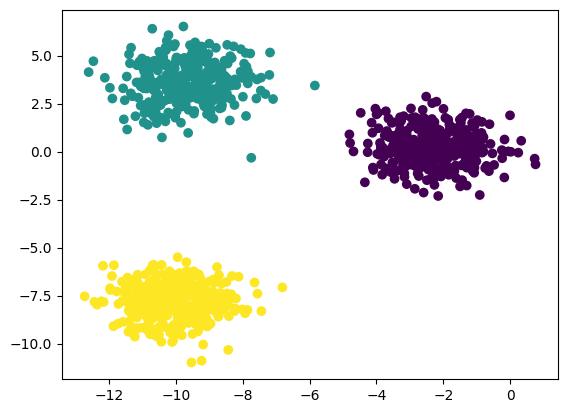

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1339.9999999999995,
 566.9220765240881,
 77.50650972932611,
 66.23154898793887,
 55.568072580604365,
 55.19078534887085,
 41.267420607352356,
 39.19933928851957,
 32.966349680216815,
 30.885021019097188]

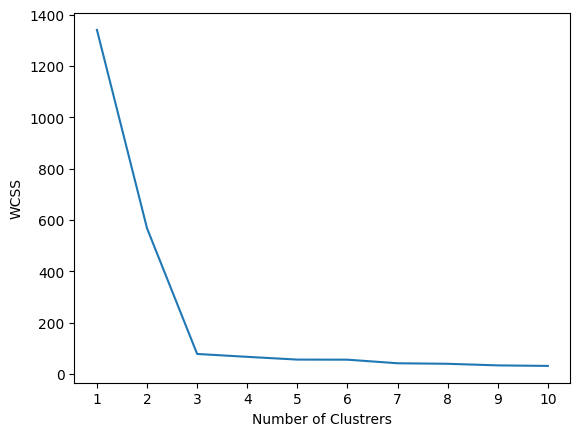

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)

array([2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 0, 0, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1,
       2, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0,
       1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2,

In [16]:
y_pred=kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2,
       0, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 0, 0,
       2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1,
       0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1,
       0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 1, 2, 1, 2,
       0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0,
       1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1,
       2, 2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 2,
       1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1,
       0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,

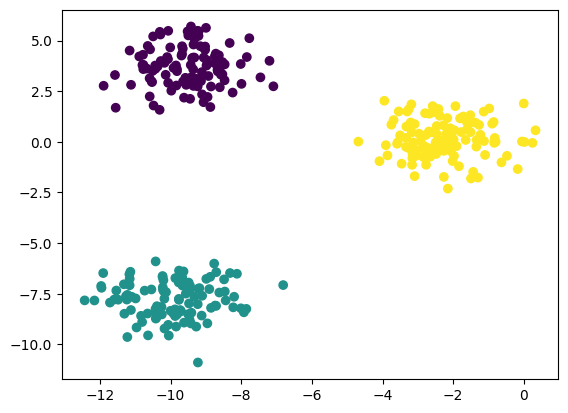

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [19]:
## kneelocator
!pip install kneed

In [21]:
from kneed import KneeLocator

In [23]:
k1=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
k1.elbow

np.int64(3)

In [24]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [25]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [26]:
silhouette_coefficients

[np.float64(0.6054672897285989),
 np.float64(0.8008043983891622),
 np.float64(0.6511203884227715),
 np.float64(0.5122303440458686),
 np.float64(0.47997138971458053),
 np.float64(0.35813633340919476),
 np.float64(0.3453957146922197),
 np.float64(0.32629922962708496),
 np.float64(0.3446719591524812)]

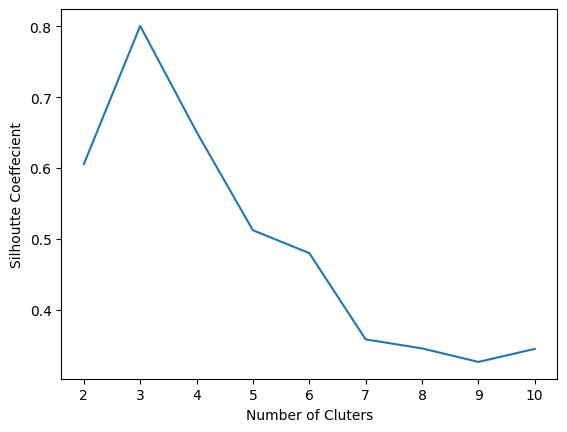

In [27]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()